In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

In [19]:
all_data = pd.read_csv('/Users/madelinecampbell/Documents/GitHub/projects/politicians_net_worth/data/opensecrets.csv')

all_data.head()

,Unnamed: 0,rank,name,min_worth,avg_worth,max_worth,chamber,year
0,0,1,Mark Warner (D-Va),"$80,129,151","$214,092,575","$348,056,000",Senate,2018
1,1,2,Greg Gianforte (R-Mont),"$189,334,335","$189,334,335","$189,334,335",House,2018
2,2,3,Paul Mitchell (R-Mich),"$75,420,142","$179,610,071","$283,800,000",House,2018
3,3,4,Vernon Buchanan (R-Fla),"$32,310,120","$157,169,056","$282,027,993",House,2018
4,4,5,Chris Collins (R-NY),"$80,834,052","$154,497,026","$228,160,000",House,2018


In [67]:
all_data['party'] = all_data['name'].str.split('-').str[-2].str.split('(').str[-1]
# all_data['pol'] = all_data['name'].str.split('(').str[0].str[:-1]
all_data['state'] = all_data['name'].str.split('-').str[-1].str.replace(')', '')
all_data['name'] = all_data['name'].str.replace('.', '')

all_data['net_worth'] = all_data['avg_worth'].str.replace(',', '').str.replace('$', '')

all_data.head()

<ipython-input-67-f14e001a5861>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  all_data['state'] = all_data['name'].str.split('-').str[-1].str.replace(')', '')
<ipython-input-67-f14e001a5861>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  all_data['name'] = all_data['name'].str.replace('.', '')
<ipython-input-67-f14e001a5861>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  all_data['net_worth'] = all_data['avg_worth'].str.replace(',', '').str.replace('$', '')


,Unnamed: 0,rank,name,min_worth,avg_worth,max_worth,chamber,year,party,state,net_worth
0,0,1,Mark Warner (D-Va),"$80,129,151","$214,092,575","$348,056,000",Senate,2018,D,Va,214092575
1,1,2,Greg Gianforte (R-Mont),"$189,334,335","$189,334,335","$189,334,335",House,2018,R,Mont,189334335
2,2,3,Paul Mitchell (R-Mich),"$75,420,142","$179,610,071","$283,800,000",House,2018,R,Mich,179610071
3,3,4,Vernon Buchanan (R-Fla),"$32,310,120","$157,169,056","$282,027,993",House,2018,R,Fla,157169056
4,4,5,Chris Collins (R-NY),"$80,834,052","$154,497,026","$228,160,000",House,2018,R,NY,154497026


In [68]:
df = all_data[['name', 'party', 'state', 'chamber', 'year', 'net_worth']]
df['net_worth'] = df['net_worth'].astype(int)

df.head()

<ipython-input-68-7b24cd9b0081>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['net_worth'] = df['net_worth'].astype(int)


,name,party,state,chamber,year,net_worth
0,Mark Warner (D-Va),D,Va,Senate,2018,214092575
1,Greg Gianforte (R-Mont),R,Mont,House,2018,189334335
2,Paul Mitchell (R-Mich),R,Mich,House,2018,179610071
3,Vernon Buchanan (R-Fla),R,Fla,House,2018,157169056
4,Chris Collins (R-NY),R,NY,House,2018,154497026


/Users/madelinecampbell/opt/miniconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


<AxesSubplot:xlabel='year', ylabel='avg_worth'>

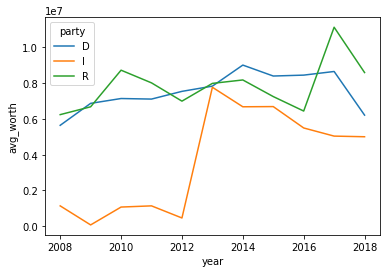

In [81]:
df.loc[df['name'] == 'John K Delaney (D)', 'party'] = 'D'

df_leg = df[df.party.isin(['D', 'I', 'R']) & df.chamber.isin(['House', 'Senate'])]


yr_gp = df_leg.groupby(['year', 'party']).agg({'name':'size', 'net_worth':'sum'}).reset_index()
yr_gp['avg_worth'] = yr_gp['net_worth'] / yr_gp['name']

sns.lineplot(data=yr_gp, x="year", y="avg_worth", hue="party")


In [82]:
df_leg = df_leg.sort_values(by=['name', 'year'])

df_leg['pct_change'] = df_leg.groupby(['name'])['net_worth'].pct_change()
df_leg = df_leg.replace([np.inf, -np.inf], np.nan)

df_leg

,name,party,state,chamber,year,net_worth,pct_change
1544,Aaron Schock (R-Ill),R,Ill,House,2009,41302,NaN
2104,Aaron Schock (R-Ill),R,Ill,House,2010,100913,1.443296
2652,Aaron Schock (R-Ill),R,Ill,House,2011,144186,0.428815
3100,Aaron Schock (R-Ill),R,Ill,House,2012,535087,2.711088
3588,Aaron Schock (R-Ill),R,Ill,House,2013,1023694,0.913136
...,...,...,...,...,...,...,...
4047,Zoe Lofgren (D-Calif),D,Calif,House,2014,2603022,0.293734
4558,Zoe Lofgren (D-Calif),D,Calif,House,2015,2469021,-0.051479
5081,Zoe Lofgren (D-Calif),D,Calif,House,2016,2715019,0.099634
5605,Zoe Lofgren (D-Calif),D,Calif,House,2017,2741052,0.009589


In [84]:
df_leg.to_csv('/Users/madelinecampbell/Documents/GitHub/projects/politicians_net_worth/data/net_worth_pchange.csv')

In [75]:
df_leg.groupby(['party'])['pct_change'].mean()
df_leg.groupby(['party'])['pct_change'].max()
df_leg.groupby(['party'])['pct_change'].min()

df_leg[df_leg['pct_change'] > 50]

party
D     -21.875000
I      -6.988051
R   -2712.966637
Name: pct_change, dtype: float64

In [80]:
df_leg[df_leg['pct_change'] < -10]

,name,party,state,chamber,year,net_worth,pct_change
5855,Adam Smith (D-Wash),D,Wash,House,2017,18005,-10.025063
5706,Bill Johnson (R-Ohio),R,Ohio,House,2017,873519,-13.050865
5886,Carol Shea-Porter (D-NH),D,NH,House,2017,-167000,-21.875000
1360,Chris Murphy (D-Conn),D,Conn,House,2009,684999,-11.538284
4427,Jeff Fortenberry (R-Neb),R,Neb,House,2015,12193002,-2712.966637
3140,Marco Rubio (R-Fla),R,Fla,Senate,2012,384509,-11.255488
3852,Martin Heinrich (D-NM),D,NM,Senate,2013,-1160994,-17.703267
255,Patrick McHenry (R-NC),R,NC,House,2018,765007,-15.038629
5410,Pete Aguilar (D-Calif),D,Calif,House,2016,-636997,-10.298683
5940,Tammy Duckworth (D-Ill),D,Ill,Senate,2017,-10548913,-19.870199


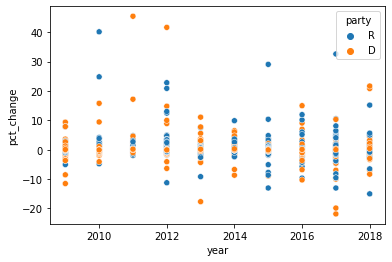

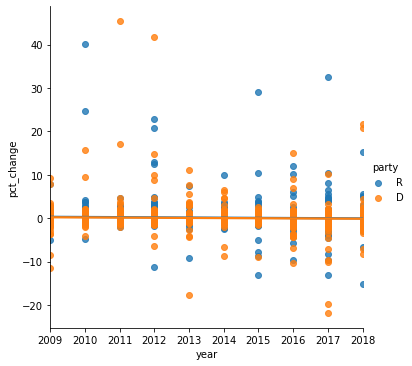

In [72]:
df_lim = df_leg[(df_leg['pct_change'] > -50) & (df_leg['pct_change'] < 50) & (df_leg['party'] != 'I')]

sns.scatterplot(data=df_lim, x="year", y="pct_change", hue="party") #jitter?
g = sns.lmplot(data=df_lim, x="year", y="pct_change", hue="party")



In [74]:
df_leg.groupby(['name'])['year'].agg({'min','max', 'count'}).reset_index()

,name,count,min,max
0,Aaron Schock (R-Ill),7,2009,2015
1,Adam H Putnam (R-Fla),3,2008,2010
2,Adam Kinzinger (R-Ill),8,2011,2018
3,Adam Schiff (D-Calif),11,2008,2018
4,Adam Smith (D-Wash),11,2008,2018
5,Adrian Smith (R-Neb),11,2008,2018
6,Adriano Espaillat (D-NY),2,2017,2018
7,Al Franken (D-Minn),8,2009,2016
8,Al Green (D-Texas),11,2008,2018
9,Al Lawson (D-Fla),2,2017,2018
